<a href="https://colab.research.google.com/github/khan441shahrukh/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Import packages and data preparation






























































importing the libraries for to reduse code 













In [ ]:
pip install plotly

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoLars
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


mounting the drive for accessing drive filles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


to import data and store the some variables

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Machine Learning/Capstone project 2/Rossmann Stores Data.csv')
dataset1=pd.read_csv('/content/drive/MyDrive/Almabetter/Machine Learning/Capstone project 2/store.csv')

for inspection of the data

In [ ]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
dataset1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
dataset.shape

(1017209, 9)

In [ ]:
dataset1.shape

(1115, 10)

In [ ]:
dataset.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1



```

to find any null values or missing  are accurred or not its mojar one if we don't check the null values it we have lot of chances to get erorr

In [ ]:
dataset.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
dataset1.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# Feature Engineering

in dataset1 4 variables have lot null values so we have to drop the variables 

In [ ]:
dataset2=dataset1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)

in the CompetitionDistance(variable) have 3 null values so we have to replace the some assumuning values

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

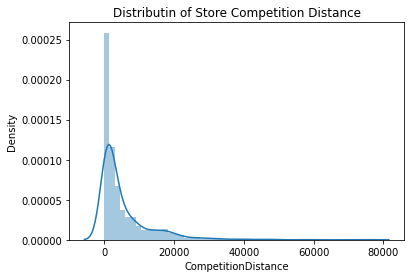

In [ ]:
sns.distplot(dataset2.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

so its right swewed and replacing values into meadian of the values it not effect 

In [ ]:
dataset2.CompetitionDistance.fillna(dataset2.CompetitionDistance.median(), inplace=True)

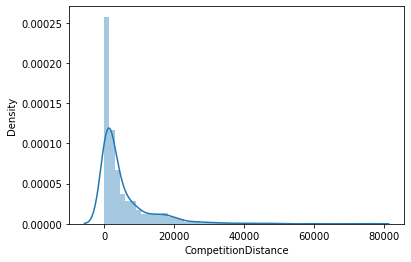

In [ ]:
sns.distplot(dataset2.CompetitionDistance.dropna())

to extract year,month and day from data

In [ ]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1


to marging into one table 

In [ ]:
df = pd.merge(dataset, dataset2, how='left', on='Store')
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,2015,7,31,a,a,310.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,2015,7,31,a,c,24000.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,2015,7,31,a,a,7520.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,2015,7,31,a,c,2030.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,2015,7,31,a,a,3160.0,0


if stores are close it wont genarate sales so which stores are closed that we have to drop

In [ ]:
df = df[df.Open != 0]

df = df.drop('Open', axis=1)

for knowing if store is opened but no sales

In [ ]:
df[df.Sales == 0]['Store'].sum()

31460

to find percentage

In [ ]:
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
df = df[df.Sales != 0]

let as jump into  Feature Engineering

let as know about the variables 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844338 non-null  int64  
 1   DayOfWeek            844338 non-null  int64  
 2   Date                 844338 non-null  object 
 3   Sales                844338 non-null  int64  
 4   Customers            844338 non-null  int64  
 5   Promo                844338 non-null  int64  
 6   StateHoliday         844338 non-null  object 
 7   SchoolHoliday        844338 non-null  int64  
 8   year                 844338 non-null  int64  
 9   month                844338 non-null  int64  
 10  day                  844338 non-null  int64  
 11  StoreType            844338 non-null  object 
 12  Assortment           844338 non-null  object 
 13  CompetitionDistance  844338 non-null  float64
 14  Promo2               844338 non-null  int64  
dtypes: float64(1), i

to see nominal variables

In [ ]:
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
convert number 0 to string 0

In [ ]:
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

to copy data into another variables for not loosing any data 

In [ ]:
df1 = df.copy()

to create another variable for avarage sales in monthly manar 

In [ ]:
sales = df1[['year','month','Store','Sales']].groupby(['year','month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()


In [ ]:
df1['sales_key']=df1['year'].map(str) + df1['month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['year'].map(str) + sales['month'].map(str) + sales['Store'].map(str)

now we droping the extra columns 

In [ ]:
sales = sales.drop(['year','month','Store'], axis=1)



to marging sales and df1

In [ ]:
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

create a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [ ]:
cust = df1[['year','month','Store','Customers']].groupby(['year','month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [ ]:
df1['cust_key']=df1['year'].map(str) + df1['month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['year'].map(str) + cust['month'].map(str) + cust['Store'].map(str)

droping the original variables

In [ ]:
df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['year', 'month', 'Store'], axis=1)

to again marging

In [ ]:
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

tranform variable stateholidy  0 means not stateholidy 1 means stateholidy

In [ ]:
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [ ]:
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)# droping extra columns

# Exploratory data analysis & Correlation

Store Sales Prediction

In [ ]:
df1.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,year,month,day,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,5263,1,0,1,2015,7,31,c,a,1270.0,0,4491.333333,519.407407
1,5,6064,1,0,1,2015,7,31,a,a,570.0,1,4954.259259,621.222222
2,5,8314,1,0,1,2015,7,31,a,a,14130.0,1,6797.592593,682.888889
3,5,13995,1,0,1,2015,7,31,c,c,620.0,0,10256.851852,1294.259259
4,5,4822,1,0,1,2015,7,31,a,a,29910.0,0,4599.629630,521.703704


In [ ]:
data=df1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904206 entries, 0 to 904205
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            904206 non-null  int64  
 1   Sales                904206 non-null  int64  
 2   Promo                904206 non-null  int64  
 3   StateHoliday         904206 non-null  int64  
 4   SchoolHoliday        904206 non-null  int64  
 5   year                 904206 non-null  int64  
 6   month                904206 non-null  int64  
 7   day                  904206 non-null  int64  
 8   StoreType            904206 non-null  object 
 9   Assortment           904206 non-null  object 
 10  CompetitionDistance  904206 non-null  float64
 11  Promo2               904206 non-null  int64  
 12  AvgSales             904206 non-null  float64
 13  AvgCustomer          904206 non-null  float64
dtypes: float64(3), int64(9), object(2)
memory usage: 103.5+ MB


In [ ]:
data.shape

(904206, 14)

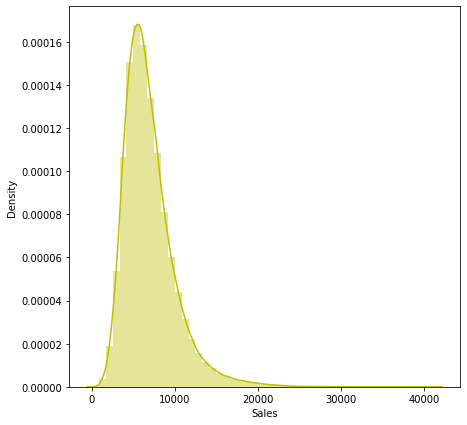

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(data['Sales'],color="y")

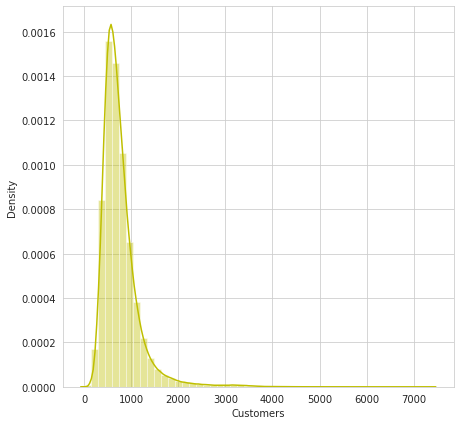

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['Customers'],color="y")

In [ ]:
numeric_features = data.describe().columns

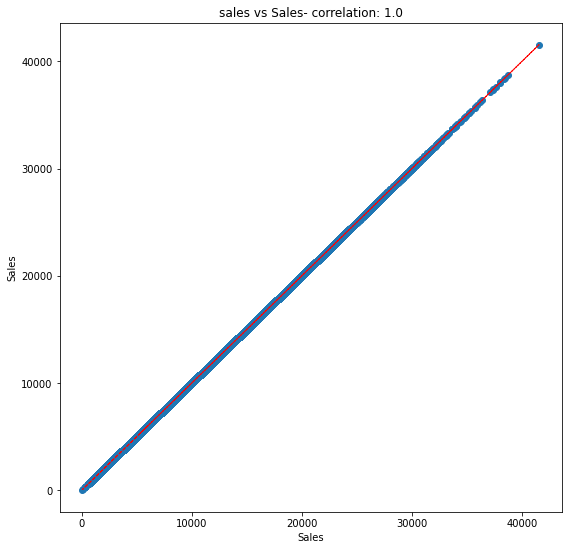

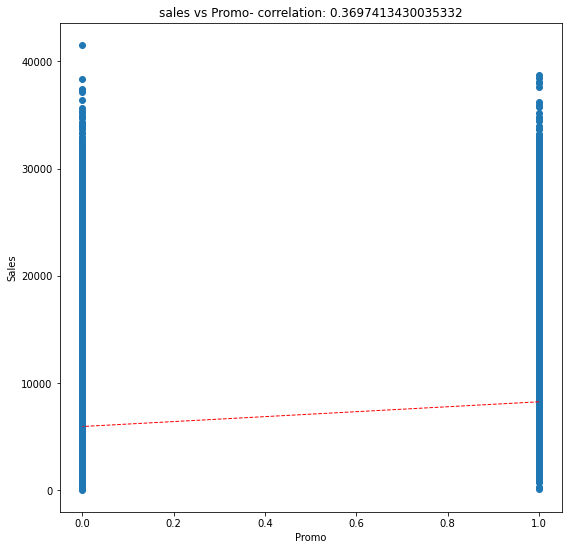

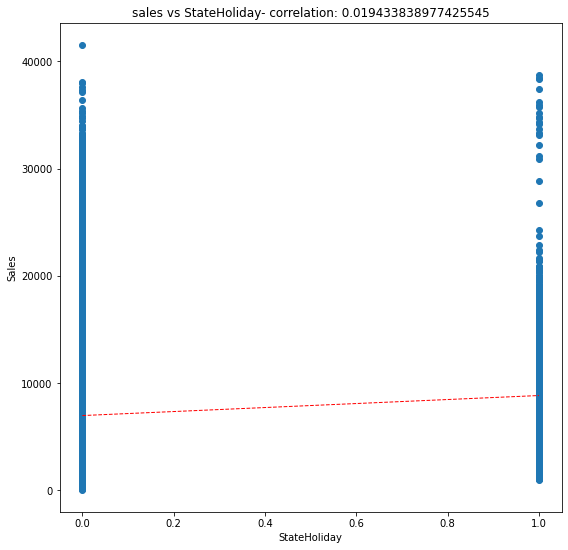

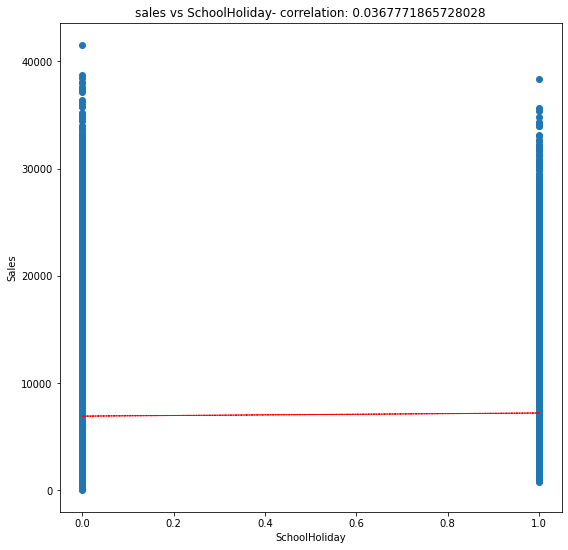

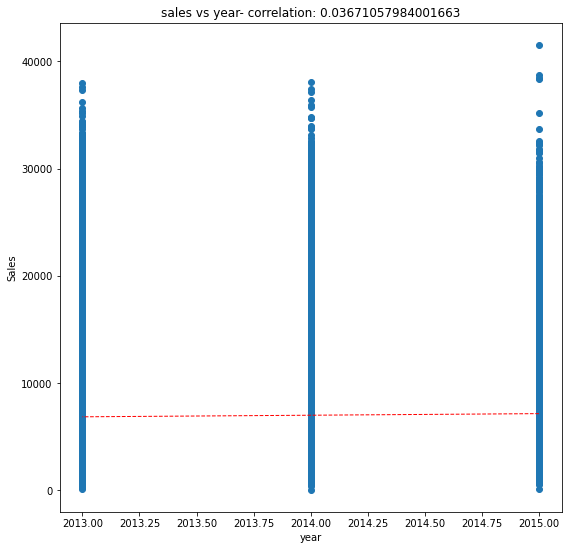

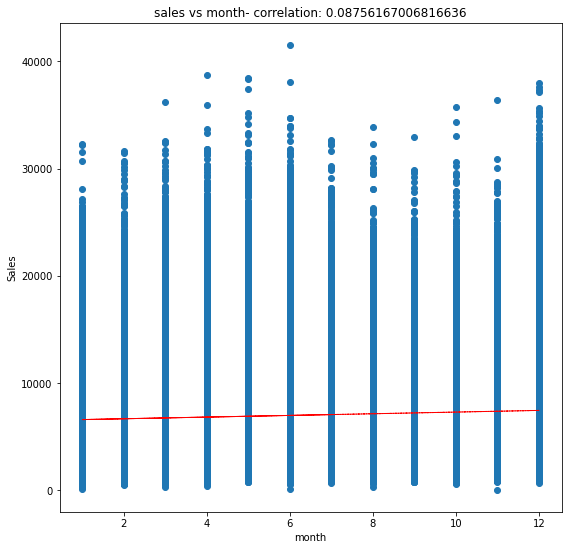

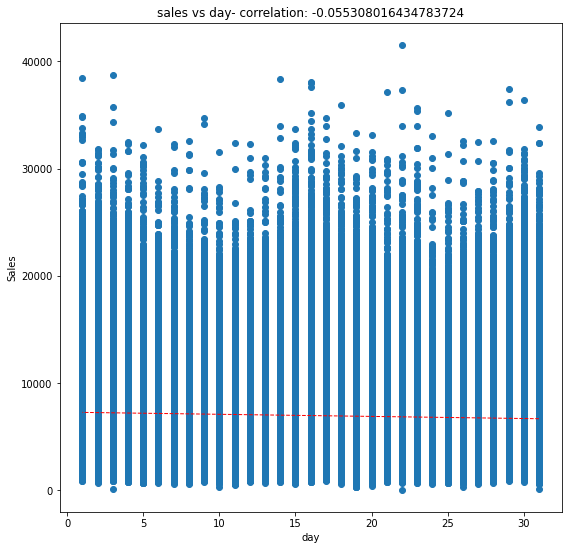

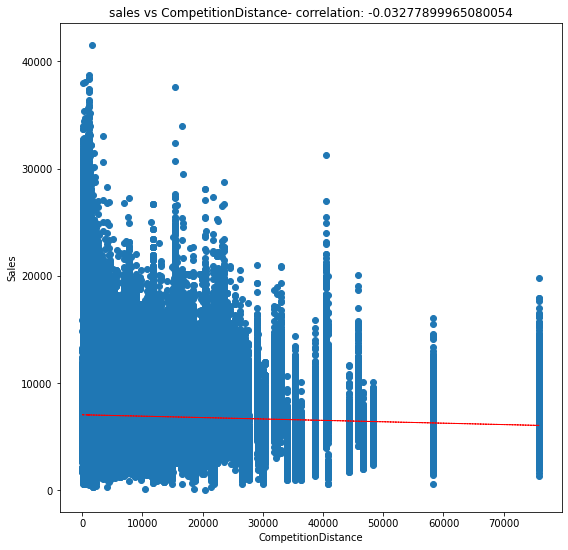

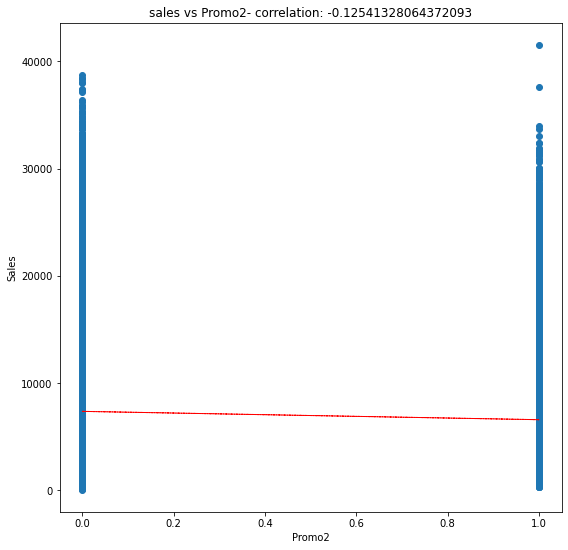

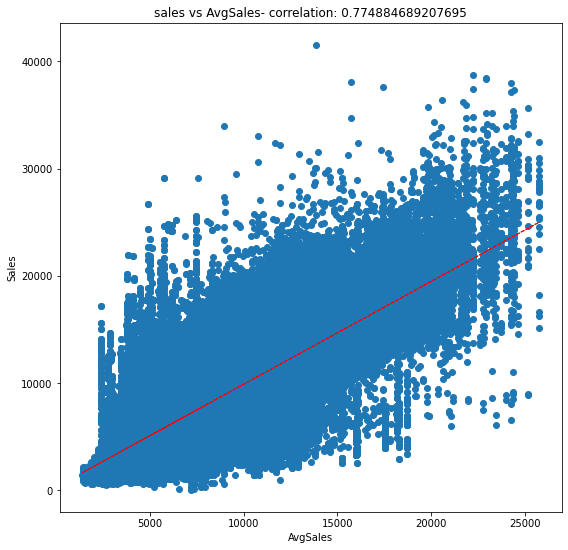

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 9))
    ax = fig.gca()
    feature = data[col]
    label = data['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Sales'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

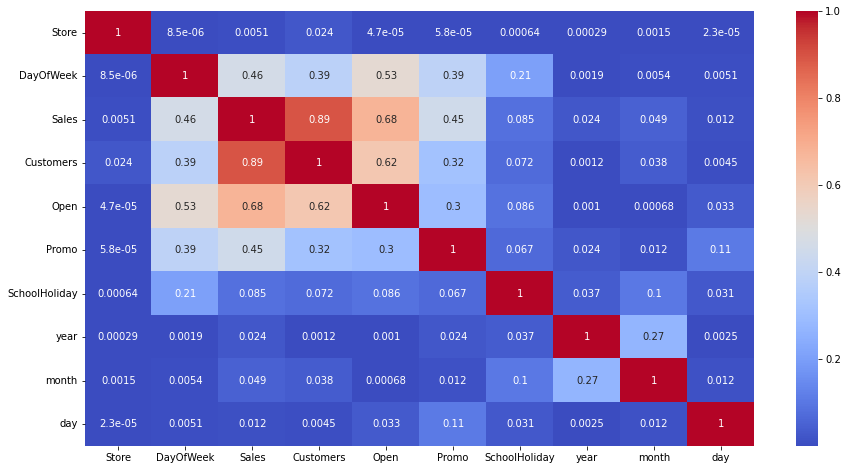

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
store1_2015 = df.query('Store == 1 and year == 2015')
store1_2013 = df.query('Store == 1 and year == 2013')
store1_2014 = df.query('Store == 1 and year == 2014')

In [ ]:
trace_2013 = go.Scatter(
                x=store1_2013.Date,
                y=store1_2013.Sales,
                name = "2013",
                opacity = 0.8)

trace_2014 = go.Scatter(
                x=store1_2014.Date,
                y=store1_2014.Sales,
                name = "2014",
                opacity = 0.8)

trace_2015 = go.Scatter(
                x=store1_2015.Date,
                y=store1_2015.Sales,
                name = "2015",
                opacity = 0.8)

data = [trace_2013,trace_2014, trace_2015]
layout = go.Layout(title='Sales Over Time', 
                   xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
fig

In [ ]:
distance_s = [go.Scatter(x=dfv.CompetitionDistance, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.Customers,
                                 colorbar=dict(title='Number Of Customers'),colorscale='Jet'))]
layout10 = go.Layout(title='Sales vs. Competition Distance', 
                   xaxis=dict(title='Competition Distance'), yaxis=dict(title='Sales'))
fig2 = go.Figure(data=distance_s, layout=layout10)
fig2


**sales predection by using regression models**

In [ ]:
, 
# I had to use to sample dataset with 50000 observations to build ML models.
dfd = df1.sample(n=50000, random_state=1)

In [ ]:
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [ ]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)



In [ ]:
xl = X.copy()


label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

# Train Test Split

In [ ]:
# split training and test datasets

xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

# Linear Regression

In [ ]:
lin= LinearRegression()
reg = lin.fit(xd_train, yd_train)

In [ ]:
reg.score(xd_train, yd_train)

0.7523547711295092

In [ ]:
reg.coef_

array([-1.41170167e+02,  2.18160047e+03, -4.23839175e+02,  1.48326518e+02,
        1.32462664e+01,  2.62296028e+01, -1.89906529e+00,  6.54887117e-03,
        2.89591777e+01,  8.43614860e-01,  1.07184864e+00, -8.48202304e+00,
       -7.80830624e+01, -2.80080129e+01,  1.14573098e+02,  2.40148190e+02,
       -5.78497680e+02,  3.38349490e+02])

In [ ]:
len(reg.coef_)

18

In [ ]:
reg.intercept_

-27362.773759425665

In [ ]:


def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7523547711295092 , Out of Sample Test Score : 0.7361563851488989
Training RMSE : 1562.101823859111 Testing RMSE : 1573.5221139534203
Training MAPE : 17.016359240314582 Testing MAPE : 17.21421514499293


# Lasso Regression

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.752334522979867 , Out of Sample Test Score : 0.7360315485990351
Training RMSE : 1562.1656834075554 Testing RMSE : 1573.8943227750476
Training MAPE : 17.017185237169365 Testing MAPE : 17.213416546601415


# Decision Tree

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [ ]:
print("Regresion Model Score" , ":" , treereg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xl_test, yl_test))

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)
print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.8497074839166132 , Out of Sample Test Score : 0.7859612854335959
Training RMSE : 1216.9228178305223 Testing RMSE : 1417.2475783416903
Training MAPE : 12.49583318025902 Testing MAPE : 14.756184436417788


# Random Forest

In [ ]:
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [ ]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.9769302470020471 , Out of Sample Test Score : 0.8364031945053068
Training RMSE : 476.7775846255745 Testing RMSE : 1239.0446763926782
Training MAPE : 4.831332668613566 Testing MAPE : 12.660191566032546


# KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.6275081976080878 , Out of Sample Test Score : 0.5761126589600647
Training RMSE : 1915.8112383595192 Testing RMSE : 1994.4574710253448
Training MAPE : 22.932501886995517 Testing MAPE : 23.871439902670968


In [ ]:
for x in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 1.0 , Out of Sample Test Score : 0.25667577730057733
Regresion Model Score : 0.8259322438851736 , Out of Sample Test Score : 0.4249025315111531
Regresion Model Score : 0.7623582158361921 , Out of Sample Test Score : 0.488223198965818
Regresion Model Score : 0.7297607510955559 , Out of Sample Test Score : 0.5115585944519914
Regresion Model Score : 0.7089492750912322 , Out of Sample Test Score : 0.5295699324633296
Regresion Model Score : 0.6925631736963394 , Out of Sample Test Score : 0.5415268731970324
Regresion Model Score : 0.6819616471945467 , Out of Sample Test Score : 0.546554471363228
Regresion Model Score : 0.6740629399105917 , Out of Sample Test Score : 0.5535399672444765
Regresion Model Score : 0.6679852096652346 , Out of Sample Test Score : 0.5578173430149174
Regresion Model Score : 0.6616464177640227 , Out of Sample Test Score : 0.5612278982541374
Regresion Model Score : 0.6561030835853547 , Out of Sample Test Score : 0.5631873273619019
Regresion Model